# Activity 4 Code
## Isaiah Rafael 1007211

## Task 2c (Approach 2)
Determining number of k runs needed to simulate within MOE 5

In [4]:
from scipy import stats
import math

def find_min_runs(s, tol, confidence=0.95):
    k = 2
    alpha = 1 - confidence
    while True:
        t_critical = stats.t.ppf(1 - alpha/2, df=k-1)
        margin_error = t_critical * (s / math.sqrt(k))
        if margin_error <= tol:
            break
        k += 1
    print(f"Minimum number of runs needed: {k}")
    return k

find_min_runs(s=19.84, tol=5)


Minimum number of runs needed: 63


63

## Task 3

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

### Inventory model starter code

In [6]:
# Set up parameters
lmbda = 100 # mean demand size 
c = 2 # unit sales price
h = 0.1 # storage cost per item
K = 10 # fixed ordering cost
k = 1 # marginal ordering cost per item
p = 0.9 # probability that order arrives

## Write function to compute a realization of total profit over D days
def SimulateOneRun(s,S,D):
    DailyProfit = [] # instead of total profit over D days, we want the vector of profits for all D days
    X = S # X_j is the inventory level at beginning of day j
    for j in range(D):
        profit = 0
        demand = np.random.poisson(lmbda)
        # print(demand)
        sales = min(X,demand) # sales=min(D_j,X_j)
        # print(sales)
        Y = X - sales # Y_j=max(0,X_j-D_j) is the inventory level after sales
        if (Y < s) and (np.random.uniform()<p):
            # if order made and it arrives
            profit = - (K + k * (S-Y)) # order of S-Y_j arrives
            X = S # X_{j+1}
        else:
            X = Y # X_{j+1}
        profit = profit + c*sales - h*X # earn sales revenue, incur storage cost
        DailyProfit.append(profit)
    return DailyProfit

### Demo of starter code

In [7]:
s = 80
S = 500
D = 500 # number of days
DailyProfits = SimulateOneRun(s, S, D)
# this returns the list of the 500 daily profits obtained over 500 days of the simulation
print(DailyProfits)

[160.0, 159.5, 190.0, 190.0, -372.0, 178.9, 158.3, 203.4, 176.7, -381.0, 145.3, 181.9, 186.2, 219.6, 168.0, -560.0, 166.3, 185.0, 151.6, 177.0, -344.0, 168.4, 174.6, 193.2, -260.0, 141.1, 150.2, 178.2, 192.4, -343.0, 139.0, 139.6, 146.1, 186.1, -324.0, 160.0, 209.9, 221.8, -293.0, 160.0, 125.9, 173.7, 221.3, -346.0, 166.3, 182.9, 136.8, 151.0, 222.2, 36.0, -560.0, 166.3, 164.0, 163.2, 212.3, 175.1, -542.0, 168.4, 180.9, 189.3, 185.0, -380.0, 199.9, 186.6, 172.1, 179.5, -390.0, 157.9, 146.8, 168.3, 179.9, 170.6, -492.0, 120.1, 132.4, 201.6, 185.5, -336.0, 176.8, 181.3, 168.7, 152.9, -342.0, 174.7, 200.1, 228.3, -304.0, 172.6, 151.7, 175.5, 193.7, -358.0, 178.9, 177.2, 164.4, 194.6, -380.0, 166.3, 191.3, 183.4, -267.0, 134.8, 173.0, 197.9, 229.8, -396.0, 145.3, 219.7, 167.0, 167.9, -358.0, 149.5, 196.8, 216.5, -279.0, 187.3, 196.5, 199.3, -290.0, 145.3, 175.6, 213.2, 166.0, -364.0, 160.0, 144.8, 155.7, 189.8, -336.0, 132.7, 179.2, 177.1, 170.2, 223.4, -548.0, 141.1, 164.9, 145.3, 195.7, 

### Peforming Welch's Method

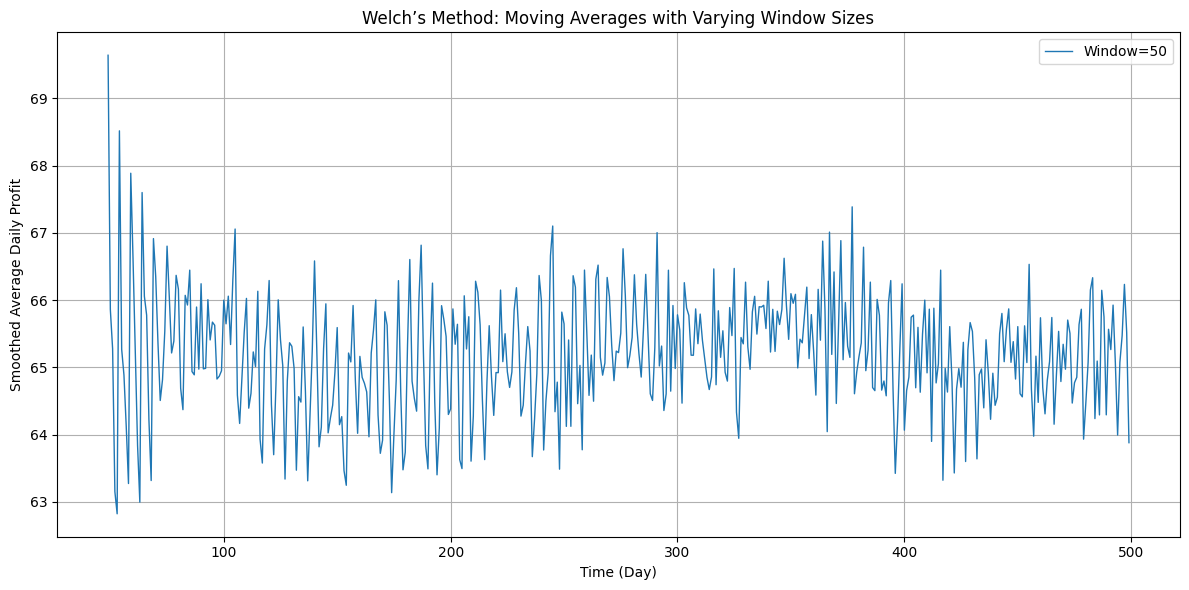

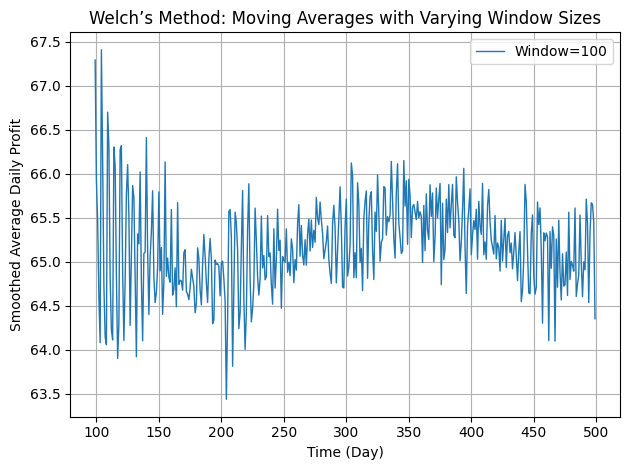

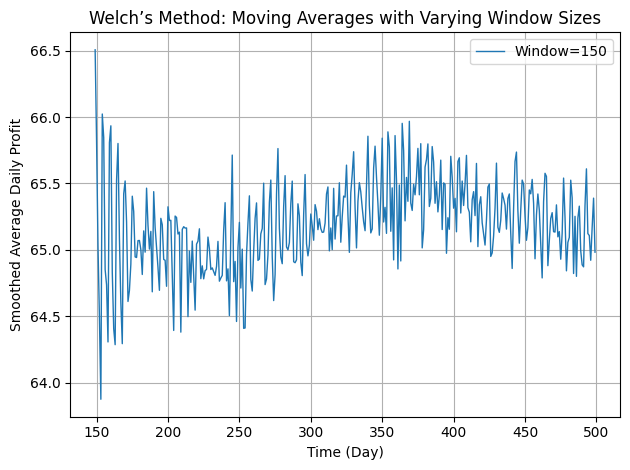

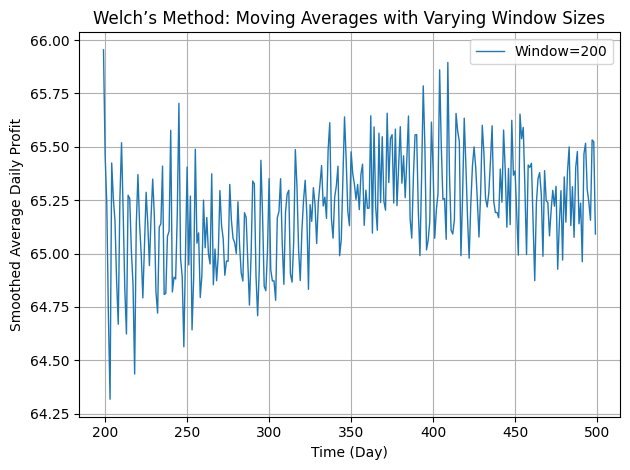

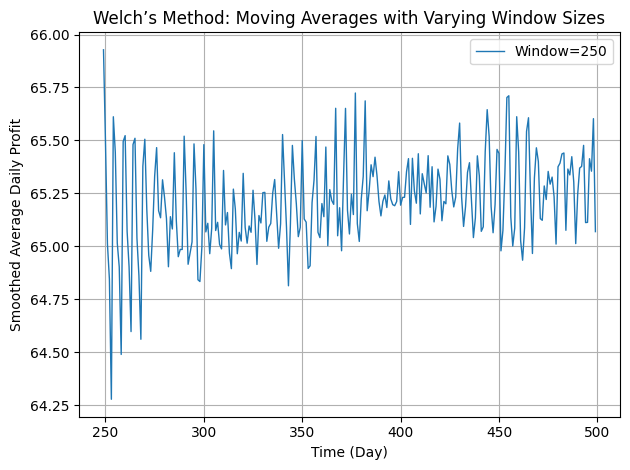

In [8]:
# Let's start by creating a matrix to store all replications since in class a CSV was provided
# We need to create our own one

R = 30 # at least 20 replications in class
replications_matrix = np.zeros((R,D))

for r in range(R):
    DailyProfits = SimulateOneRun(s, S, D)
    replications_matrix[r] = DailyProfits

# Now we calculate the average profit over the 20 replications
average_profit = np.mean(replications_matrix, axis=0)

# Plot moving averages with different window sizes
ave_results = pd.DataFrame({
    'Time': np.arange(len(average_profit)),
    'Value': average_profit
})

plt.figure(figsize=(12, 6))
for mavg in [50, 100, 150, 200, 250]:
    ave_results['moving_avg'] = ave_results['Value'].rolling(mavg).mean()
    sns.lineplot(x='Time', y='moving_avg', data=ave_results, label=f'Window={mavg}', linewidth=1)
    plt.title("Welch’s Method: Moving Averages with Varying Window Sizes")
    plt.xlabel("Time (Day)")
    plt.ylabel("Smoothed Average Daily Profit")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Determining & Setting Burn-In Period

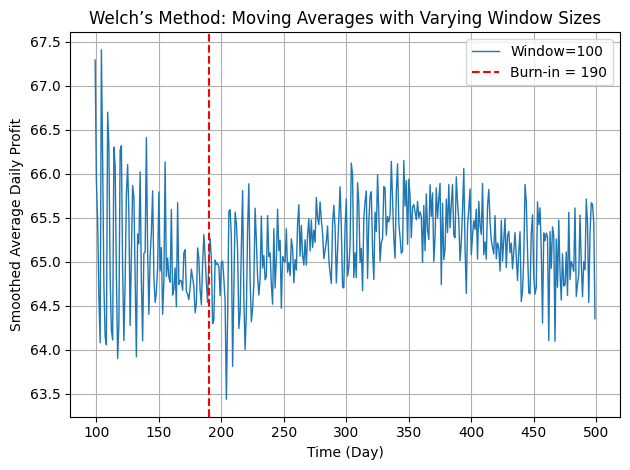

In [9]:
# Window size of 100 show a clearer burn in period and steady state
mavg = 100
ave_results['moving_avg'] = ave_results['Value'].rolling(mavg).mean()
sns.lineplot(x='Time', y='moving_avg', data=ave_results, label=f'Window={mavg}', linewidth=1)
plt.title("Welch’s Method: Moving Averages with Varying Window Sizes")
plt.xlabel("Time (Day)")
plt.ylabel("Smoothed Average Daily Profit")
plt.axvline(x=190, color='red', linestyle='--', label='Burn-in = 190')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculating Values

In [10]:
# Set burn-in value based on Welch's method
burn_in = 190

# Compute average steady-state profit per replication after burn-in
steady_state_means = []
for r in range(R):
    post_burnin_profits = replications_matrix[r, burn_in:]
    mean_profit = np.mean(post_burnin_profits)
    steady_state_means.append(mean_profit)

# Compute sample mean and standard error
mean_estimate = np.mean(steady_state_means)
std_dev = np.std(steady_state_means, ddof=1)
se = std_dev / np.sqrt(R)

# Compute 95% confidence interval (97.5% confidence means alpha=0.025 two-tailed)
t_crit = stats.t.ppf(1 - 0.025, df=R - 1)
margin_of_error = t_crit * se
ci_lower = mean_estimate - margin_of_error
ci_upper = mean_estimate + margin_of_error

mean_estimate, se, (ci_lower, ci_upper), R

# Compute 95% confidence interval (97.5% confidence means alpha=0.025 two-tailed)
print(f"Mean estimate: {mean_estimate}")
print(f"Standard error: {se}")
print(f"97.5% Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"Number of replications: {R}")


Mean estimate: 65.17329032258064
Standard error: 0.17457825479085703
97.5% Confidence Interval: (64.81623770101058, 65.5303429441507)
Number of replications: 30
